In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

In [38]:
import numpy.polynomial.polynomial as poly

beta = np.array([1,0.5,0,2])
wstd = 0.4
dtrue = len(beta)-1

nsamp = 100
xdat = np.random.uniform(-1,1,nsamp)
y0 = poly.polyval(xdat,beta)
ydat = y0 + np.random.normal(0,wstd,nsamp)

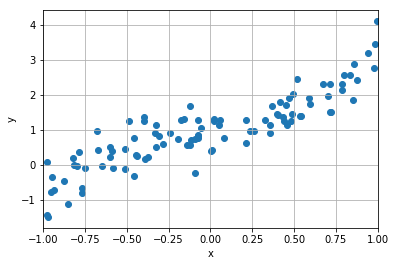

In [39]:
plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

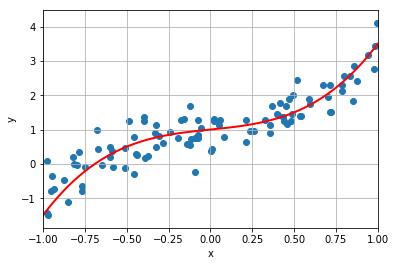

In [43]:
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim([-1,1])
plt.plot(xp,yp,'r-',linewidth = 2.0)

plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Text(0, 0.5, 'y')

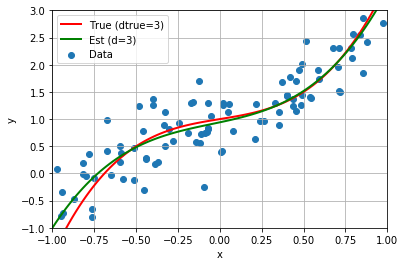

In [45]:
d = 3
beta_hat = poly.polyfit(xdat,ydat,d)

xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)

plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=2)
plt.plot(xp,yp_hat,'g-',linewidth=2)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=3)', 'Data'], loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

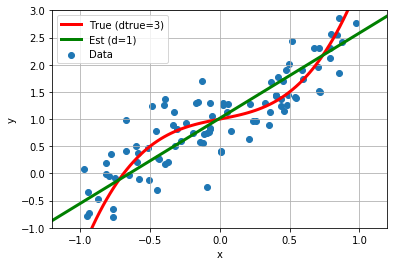

In [47]:
d = 1
beta_hat = poly.polyfit(xdat,ydat,1)

xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp, beta)
yp_hat = poly.polyval(xp,beta_hat)

plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3)
plt.plot(xp,yp_hat,'g-',linewidth=3)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=1)', 'Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()

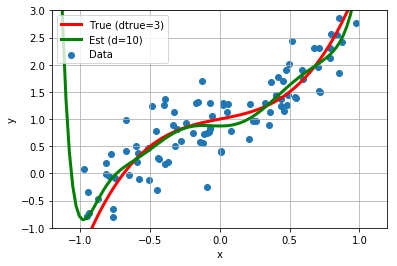

In [52]:
d = 10
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and estimated function
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1.2,1.2)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3)
plt.plot(xp,yp_hat,'g-',linewidth=3)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=10)', 'Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()

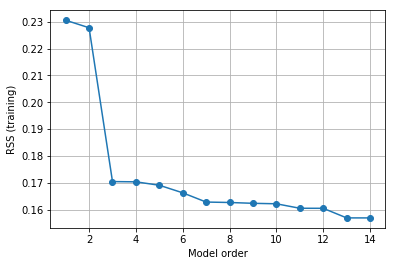

In [55]:
dtest = np.array(range(1,15))
RSStr = []
for d in dtest:
    beta_hat = poly.polyfit(xdat,ydat,d)
    yhat = poly.polyval(xdat, beta_hat)
    RSSd = np.mean((yhat-ydat)**2)
    RSStr.append(RSSd)
plt.plot(dtest,RSStr,'o-')
plt.xlabel('Model order')
plt.ylabel('RSS (training)')
plt.grid()

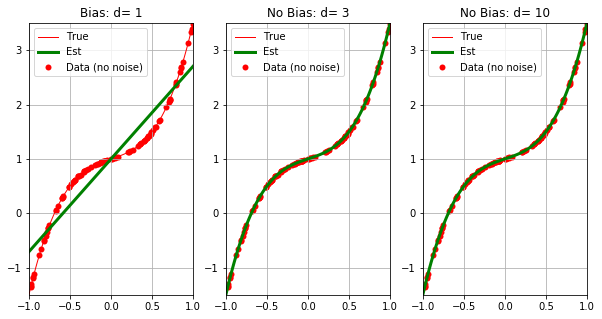

In [59]:
dtest = [1,3,10]
nd = len(dtest)

nplot = 100
xp = np.linspace(-1,1,nplot)
yp = poly.polyval(xp,beta)

yp_hat = np.zeros((nplot,nd))
plt.figure(figsize=(10,5))

for j, d in enumerate(dtest):
    beta_hat = poly.polyfit(xdat,y0,d)
    yp_hat[:,j] = poly.polyval(xp,beta_hat)
    
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=1)     
    plt.scatter(xdat,y0,marker='o',c='r',linewidth=0)
    plt.plot(xp,yp_hat[:,j],'g-',linewidth=3)
    
    if d<dtrue:
        plt.title('Bias: d= %d' % d)
    else:
        plt.title('No Bias: d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Est', 'Data (no noise)'], loc='upper left')

In [62]:
ntrial = 100
dtest = [1,3,14]
nd = len(dtest)

nplot = 30
xp = np.linspace(-1,1,nplot)
yp = poly.polyval(xp,beta)

yp_hat_mean = np.zeros((nplot,nd))
yp_hat_std = np.zeros((nplot,nd))

for j,d in enumerate(dtest):
    yp_hat = np.zeros((nplot,ntrial))
    
    for it in range(ntrial):
        ydati = y0 + np.random.normal(0,wstd,nsamp)
        
        beta_hat = poly.polyfit(xdat, ydat,d)
        yp_hat[:,it] = poly.polyval(xp,beta_hat)
        
    yp_hat_mean[:,j] = np.mean(yp_hat, axis=1)
    yp_hat_std[:,j] = np.std(yp_hat, axis = 1)

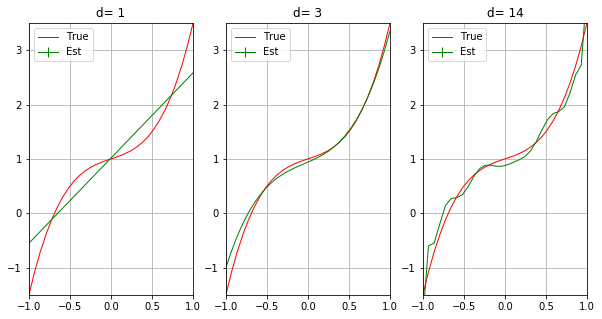

In [64]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
    
    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=1)     
    plt.errorbar(xp,yp_hat_mean[:,j],fmt='g-',yerr=yp_hat_std[:,j],linewidth=1)
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Est'], loc='upper left')

In [76]:
ntr = nsamp // 2
nts = nsamp - ntr

# Training
xtr = xdat[:ntr]
ytr = ydat[:ntr]

# Test
xts = xdat[ntr:]
yts = ydat[ntr:]

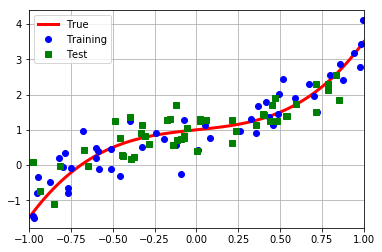

In [77]:
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=3)

# Plot data
plt.plot(xtr,ytr,'bo')
plt.plot(xts,yts,'gs')
plt.grid()
plt.legend(['True','Training','Test'],loc='upper left')

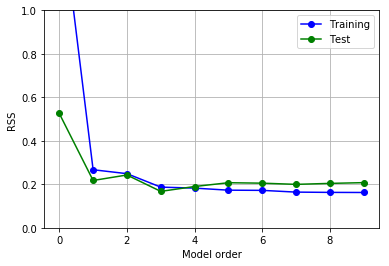

In [80]:
dtest = np.array(range(0,10))
RSStest = []
RSStr = []

for d in dtest:
    beta_hat = poly.polyfit(xtr,ytr,d)
    yhat = poly.polyval(xtr,beta_hat)
    RSSd = np.mean((yhat-ytr)**2)
    RSStr.append(RSSd)
    
    yhat = poly.polyval(xts, beta_hat)
    RSSd = np.mean((yhat-yts)**2)
    RSStest.append(RSSd)

plt.plot(dtest,RSStr,'bo-')
plt.plot(dtest,RSStest,'go-')
plt.xlabel('Model order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,1)
plt.legend(['Training','Test'],loc='upper right')

In [82]:
import  sklearn.model_selection


In [85]:
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

dtest = np.arange(0,10)
nd = len(dtest)

RSSts = np.zeros((nd,nfold))

for isplit, Ind in enumerate(kf.split(xdat)):
    Itr, Its = Ind
    
    xtr = xdat[Itr]
    ytr = ydat[Itr]
    xts = xdat[Its]
    yts = ydat[Its]
    
    for it, d in enumerate(dtest):
        beta_hat = poly.polyfit(xtr,ytr,d)
        
        yhat = poly.polyval(xts, beta_hat)
        RSSts[it,isplit] = np.mean((yhat-yts)**2)

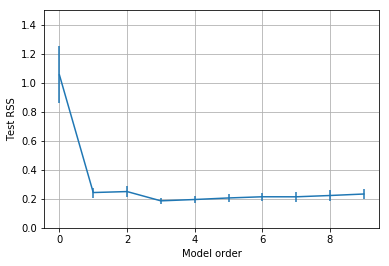

In [87]:
RSS_mean = np.mean(RSSts,axis = 1)
RSS_std = np.std(RSSts,axis = 1)/np.sqrt(nfold-1)
plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')
plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

In [89]:
imin = np.argmin(RSS_mean)
print("The selected model order is {0:d}".format(dtest[imin]))

The selected model order is 3


The estimated model order is 3


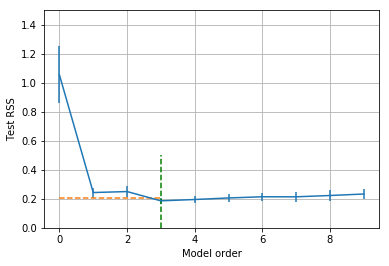

In [90]:
imin = np.argmin(RSS_mean)
RSS_tgt = RSS_mean[imin]+RSS_std[imin]

I = np.where(RSS_mean <= RSS_tgt)[0]
ipot = I[0]
dopt = dtest[ipot]

plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')

# Plot the line at the RSS target
plt.plot([dtest[0],dtest[imin]], [RSS_tgt, RSS_tgt], '--')

# Plot the line at the optimal model order
plt.plot([dopt,dopt], [0,0.5], 'g--')

plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

# Print results
print("The estimated model order is %d" % dopt)